# Image Processing

In [2]:
from PIL import Image # To read images
import numpy as np # To convert image to NumPy array
import matplotlib.pyplot as plt # To plot the image
from skimage import data # Libarary with examples of images

## Read Images from Libarary

In [3]:
image_camera = data.camera() # Load example of an image

image_camera.shape, image_camera.dtype

((512, 512), dtype('uint8'))

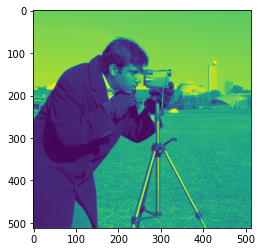

In [4]:
plt.imshow(image_camera)
plt.show()

## Read Image from Your Computer

You can download the Lena JPG image from the course website to your computer and then update the `path_to_lena` variable in your code to point to the location of the file on your computer.

In [17]:
path_to_lena = 'lena.jpg'
image_lena = Image.open(path_to_lena)
image_lena = np.array(image_lena)

image_lena.shape, image_lena.dtype

((512, 512, 3), dtype('uint8'))

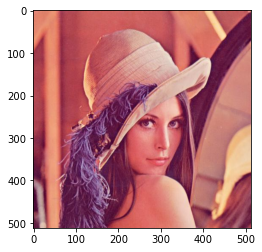

In [18]:
plt.imshow(image_lena) # imshow plot images
plt.show()

## Find Image Histogram

To create a histogram, you can first convert a 2D or 3D image into a 1D array. One way to achieve this is by using the `flatten()` function, which is a built-in method of NumPy arrays.

In [5]:
image_flat = image_camera.flatten()
image_flat.shape

(262144,)

In the previous exercise (the follow-up exercise of the last tutorial) an histogram was built using a dictionary, and now you will use a built-in function of NumPy to generate the histogram values.

In [11]:
count, bins = np.histogram(image_flat, bins=256)
len(count), len(bins)

(256, 257)

The `np.histogram` function in NumPy returns two arrays: `count` and `bins`. The count array represents the number of elements in each bin, while the bins array represents the range of values for each bin.

When plotting using `plt.plot(x, y)`, the x and y arrays need to have the same length. However, the bins array is one element longer than the count array.

To ensure that x and y have the same length, we can plot `count` against `bins[1:]`. By using `bins[1:]`, we omit the first element of the bins array, aligning the lengths of `count` and `bins[1:]`.

This way, `count` represents the y-values and `bins[1:]` represents the corresponding x-values, allowing us to plot them together using `plt.plot()`.

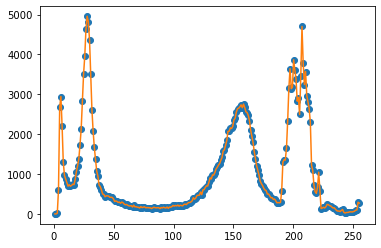

In [10]:
plt.plot(bins[1:], count, 'o') # plot the dots
plt.plot(bins[1:], count) # plot the line between the dots


Here is a function that do all the above steps:

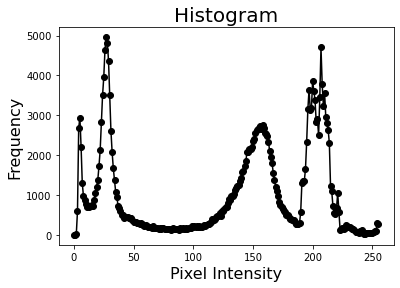

In [15]:
def plt_band_histogram(img_array):


    # Compute histograms for each band
    count, bins = np.histogram(img_array.flatten(), bins=256, range=[0, 256])

    # Plot the histograms
    plt.plot(bins[:-1], count, 'o', color='black')
    plt.plot(bins[:-1], count, color='black')
    plt.xlabel('Pixel Intensity', fontsize = 16)
    plt.ylabel('Frequency', fontsize = 16)
    plt.title('Histogram', fontsize = 20)

    
    
plt_band_histogram(image_camera)
plt.show()


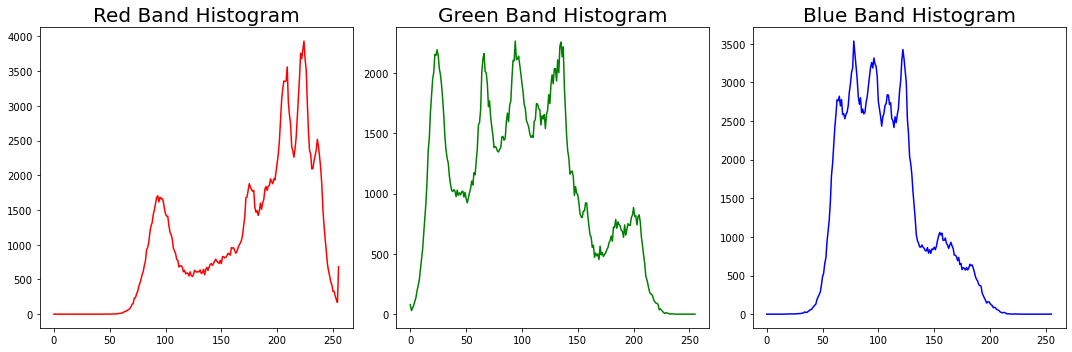

In [19]:
def plt_color_histogram_3d(img_array):

    # Split the image into RGB bands
    red_band = img_array[:, :, 0]
    green_band = img_array[:, :, 1]
    blue_band = img_array[:, :, 2]

    # Compute histograms for each band
    red_hist = np.histogram(red_band.flatten(), bins=256, range=[0, 256])
    green_hist = np.histogram(green_band.flatten(), bins=256, range=[0, 256])
    blue_hist = np.histogram(blue_band.flatten(), bins=256, range=[0, 256])

    # Plot the histograms
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(red_hist[1][:-1], red_hist[0], color='red')
    plt.title("Red Band Histogram", fontsize = 20)

    plt.subplot(1, 3, 2)
    plt.plot(green_hist[1][:-1], green_hist[0], color='green')
    plt.title("Green Band Histogram", fontsize = 20)

    plt.subplot(1, 3, 3)
    plt.plot(blue_hist[1][:-1], blue_hist[0], color='blue')
    plt.title("Blue Band Histogram", fontsize = 20)

    plt.tight_layout()

plt_color_histogram_3d(image_lena)
plt.show()
    
    


## Create Binary Plot

In [34]:
# first option:
def binary_plot(band, threshold = 256/2):

    # Create a binary image based on the threshold
    binary = np.zeros_like(band,dtype=np.uint8)
    binary[band > threshold] = 255

    # Plot the binary image
    plt.imshow(binary, cmap='gray')
    plt.axis('off')

    
# seconed option:
def binary_plot(band, threshold = 256/2):
    
    binary = np.where(band > threshold, 255, 0).astype(np.uint8)
    
    # Plot the binary image
    plt.imshow(binary, cmap='gray')
    plt.axis('off')
    



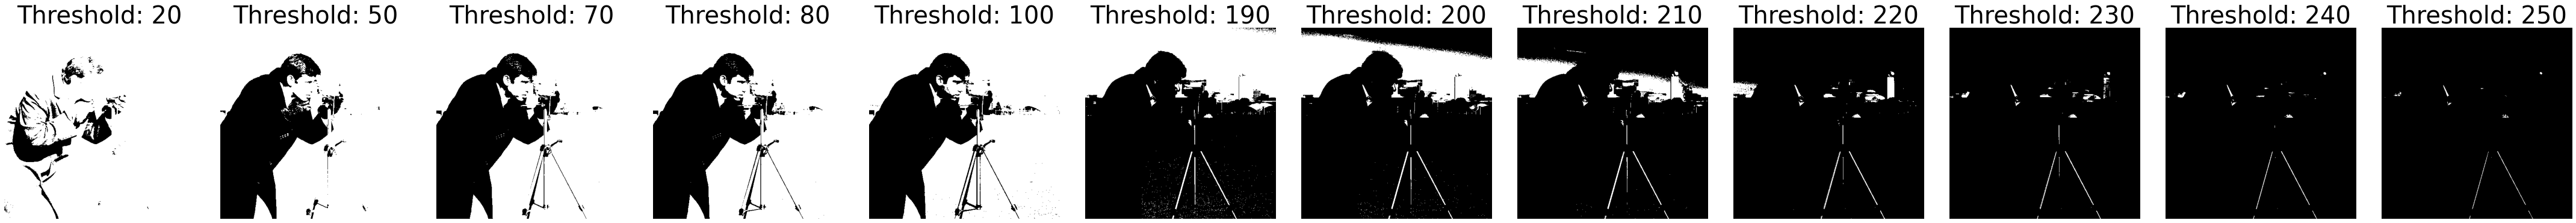

In [40]:
thersholds =[20,50,70,80,100,190,200,210,220,230,240,250]
n = len(thersholds)
plt.figure(figsize=(5*n, 5))

for i, th in enumerate(thersholds):
    plt.subplot(1, n, i+1)
    binary_plot(image_camera, th)
    plt.title("Threshold: {}".format(th), fontsize=40)
    
plt.tight_layout()
# plt.show()

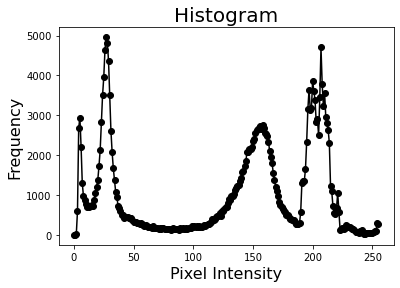

In [20]:
plt_band_histogram(image_camera)
# plt.show()